In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('playlists.csv')
dataset = dataset.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
# dataset[dataset['like']==1]
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
0,0.607,0.596,9,-9.090,0,0.358,0.1330,0.000000,0.1230,0.1490,77.324,0
1,0.912,0.412,7,-8.074,1,0.124,0.0164,0.013000,0.1040,0.4220,154.983,0
2,0.758,0.474,1,-8.720,1,0.146,0.0150,0.000000,0.1160,0.0541,76.062,0
3,0.413,0.677,1,-5.120,1,0.255,0.0249,0.000000,0.0793,0.0845,172.501,0
4,0.754,0.449,7,-9.211,1,0.109,0.0332,0.000083,0.5520,0.3570,77.169,0


['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


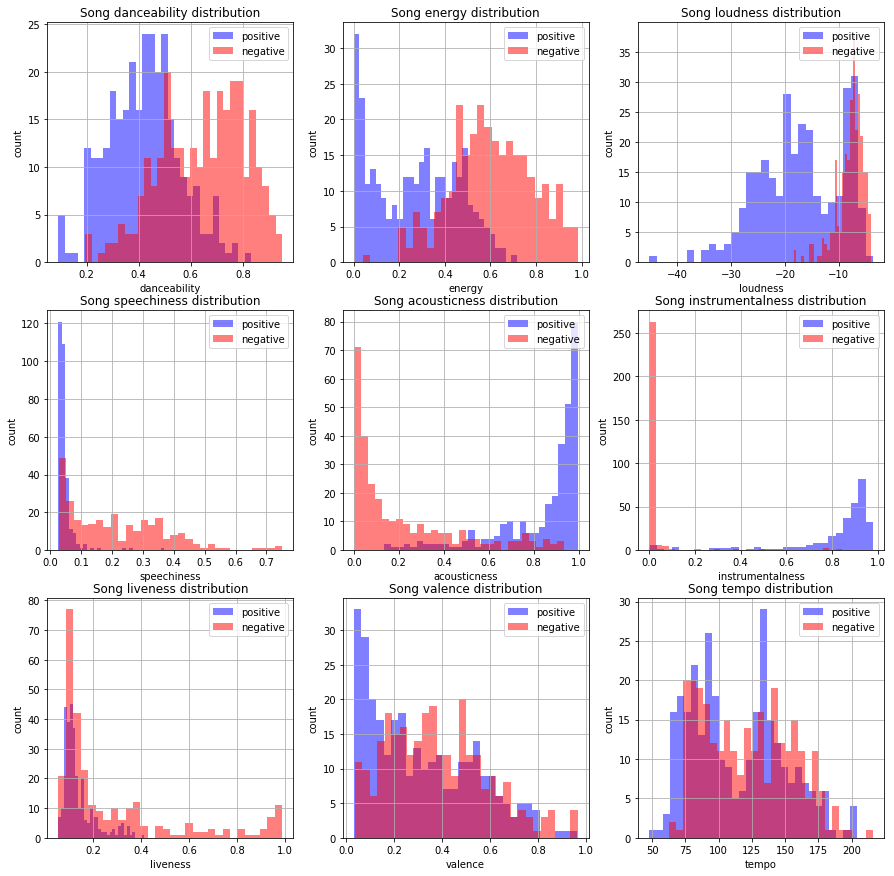

In [17]:
fig = plt.figure(figsize=(15,15))
ax = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7','ax8','ax9','ax10']
features = []
df = dataset.drop(['key','mode','like'],axis=1)
for column in df:
    features.append(column)
    
print(features)

for idx, feature in enumerate(features):
    n = 331 + idx
    ax[idx] = fig.add_subplot(n)
    ax[idx].set_xlabel(feature)
    ax[idx].set_ylabel('count')
    ax[idx].set_title('Song %s distribution' % feature)
    dataset[dataset['like']==1][feature].hist(alpha=0.5, bins=30, color='blue', label='positive')
    ax[idx].legend(loc='upper right')
    
    ax[idx+1] = fig.add_subplot(n)
    dataset[dataset['like']==0][feature].hist(alpha=0.5, bins=30, color='red', label='negative')
    ax[idx].legend(loc='upper right')
    
    

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset,test_size = 0.15, random_state = 0)
X_train = train.iloc[:, :11]
y_train = train.iloc[:,[-1]]

X_test = test.iloc[:, :11]
y_test = test.iloc[:,[-1]]

print(X_train.shape)
print(X_test.shape)

(494, 11)
(88, 11)


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(criterion = 'entropy')
dt = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  98.9 %


In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using KNN: ", round(score, 1), "%")

Accuracy using KNN:  78.4 %


In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Naive Bayes: ", round(score, 1), "%")

Accuracy using Naive Bayes:  96.6 %


In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest: ", round(score, 1), "%")

Accuracy using Random Forest:  98.9 %
